In [ ]:
def costFunction(x, y, theta0, thetas): #Cost function for linear regression
   
    n = len(x[0])
    tCost = 0
    
    for i in range(n):
        yhat = np.dot(x[:,i], thetas) + theta0 #Creating a dot product of every sample (ie row) and the learning weights (thetas) then adding the bias
        tCost = tCost + (yhat - y[i])**2
    cost = 1 / (2 * n) * tCost

    return cost #Returns the mse of the current iteration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from math import sqrt
import random

diabetes = datasets.load_diabetes() #Load diabetes dataset

X = diabetes.data
Y = diabetes.target

#Note that the diabetes dataset from sklearn is already feature scaled and normalized

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2) #Size of data used for training is 80%

X_train = np.transpose(X_train) #Reorganize data so that every column is a feature i.e. a trait

N = len(X_train[0])
numFeatures = 10

Final value of learning bias 153.282859318973
Final value of learning weights [ -32.18512152 -228.86487091  487.55196487  306.29858106 -444.02966777
  179.00186236  -89.35316549   99.48908621  606.65667155  125.092974  ]


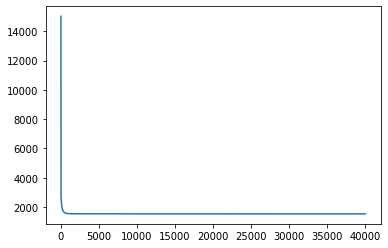


Training mse: 1522.4094212524965
Training rmse: 39.01806531918896
Training accuracy: 75.39%

Test mse: 2221.266713330374
Test rmse: 47.13031628718795
test accuracy: 64.09%


In [ ]:
iter = 40000 #Number of steps
eta = 0.9 #Learning rate
errs = [] #List stores the mse of each iteration

theta0 = 0 #Initialize bias as empty

#Initialize thetas using 10 outputs from np.random.normal(loc=0.0, scale=1.0), code itself is not included to keep consistency
thetas = [0.45435286811439624, 0.7704212959985223, 1.083182783234907, -0.5555893818115545, 0.27691995481038234, 0.4390971075506249, -0.5520405264773913, -0.37439770113092724, 1.3619882998691475, -1.225172826869053]

#Gradient descent implementation
for j in range(iter):
    t0Grad = 0
    tGrads = np.zeros(numFeatures)

    for i in range(N):
        yhat = np.dot(thetas, X_train[:, i]) + theta0

        #Update the gradients
        t0Grad += (yhat - Y_train[i])
        for k in range(numFeatures):
            tGrads[k] += (yhat - Y_train[i]) * X_train[k, i]

    #Update the parameters
    t0Grad /= N
    tGrads /= N

    errs.append(costFunction(X_train, Y_train, theta0, thetas)) #Calculates the mse of step j and adds it to the errors list
    theta0 -= eta * t0Grad
    thetas -= eta * tGrads

print("Final value of learning bias", theta0)
print("Final value of learning weights", thetas)

print("Plot of mse over each iteration")
plt.plot(errs) #Creates a graph to show mse across each step/iteration
plt.show() #Display graph

print()
print("Training mse:", errs[-1])
print("Training rmse:", sqrt(errs[-1]))

accuracy = 1 - (errs[-1]/np.var(Y_test)) #Guage accuracy of the model on the test set
print("Training accuracy: {:.2f}%".format(accuracy*100)) #Display accuracy

Y_pred = np.dot(X_test, thetas) + theta0 #Use model to make predictions on test data
mse = mean_squared_error(Y_test, Y_pred) #Create mse based on the actual test results and model predictions

print()
print("Test mse:", mse)
print("Test rmse:", sqrt(mse))

accuracy = 1 - (mse/np.var(Y_test)) #Guage accuracy of the model on the test set
print("Test accuracy: {:.2f}%".format(accuracy*100)) #Display accuracy

# Experimenting with learning rate and iterations:

Steps 10000
Step Size 0.05
Training mse: 1590.9837605527873
Training rmse: 39.88713778341067
Training accuracy: 74.28%
Test mse: 2411.7544361185046
Test rmse: 49.10961653402014
test accuracy: 61.01%

Steps 15000
Step Size 0.05
Training mse: 1550.9711738047768
Training rmse: 39.38237135832195
Training accuracy: 74.92%
Test mse: 2321.117352483069
Test rmse: 48.17797580308942
test accuracy: 62.47%

Steps 20000
Step Size 0.05
Training mse: 1538.079694717595
Training rmse: 39.21835915381462
Training accuracy: 75.13%
Test mse: 2284.7829636071106
Test rmse: 47.79940338128825
test accuracy: 63.06%

Steps 30000
Step Size 0.05
Training mse: 1531.9100836425177
Training rmse: 39.13962293689756
Training accuracy: 75.23%
Test mse: 2255.199284776595
Test rmse: 47.48893855179956
test accuracy: 63.54%

Steps 40000
Step Size 0.05
Training mse: 1530.800581567458
Training rmse: 39.12544672674624
Training accuracy: 75.25%
Test mse: 2243.595388394273
Test rmse: 47.366606257935274
test accuracy: 63.73%

Steps 40000
Step Size 0.051
Training mse: 1530.756556260715
Training rmse: 39.12488410539659
Training accuracy: 75.25%
Test mse: 2243.0070684386424
Test rmse: 47.36039556885734
test accuracy: 63.73%

Steps 40000
Step Size 0.055
Training mse: 1530.6064611689503
Training rmse: 39.12296590455471
Training accuracy: 75.25%
Test mse: 2240.9757874481015
Test rmse: 47.338945778799314
test accuracy: 63.77%

Steps 40000
Step Size 0.07
Training mse: 1530.2218327370942
Training rmse: 39.118049960818524
Training accuracy: 75.26%
Test mse: 2236.4010341907097
Test rmse: 47.29060196477425
test accuracy: 63.84%

Steps 40000
Step Size 0.1
Training mse: 1529.6680073856446
Training rmse: 39.11097042244854
Training accuracy: 75.27%
Test mse: 2233.142264044247
Test rmse: 47.25613467100591
test accuracy: 63.89%

Steps 40000
Step Size 0.3
Training mse: 1526.9873750213344
Training rmse: 39.076685824431614
Training accuracy: 75.31%
Test mse: 2228.1978309839287
Test rmse: 47.20379043026025
test accuracy: 63.97%

Steps 40000
Step Size 0.6
Training mse: 1524.2495624368823
Training rmse: 39.041638828779746
Training accuracy: 75.36%
Test mse: 2223.661444376793
Test rmse: 47.15571486444451
test accuracy: 64.05%

Steps 40000
Step Size 0.9
Training mse: 1522.4094212524965
Training rmse: 39.01806531918896
Training accuracy: 75.39%
Test mse: 2221.266713330374
Test rmse: 47.13031628718795
test accuracy: 64.09%